### Metric Learning and Plotting

This is a small walkthrough which illustrates all the Metric Learning algorithms implemented in metric_learn, and also does a quick visualisation which can help understand which algorithm might be best suited for you.

Of course, depending on the data set and the constraints your results will look very different; you can just follow this and change your data and constraints accordingly. 

### Imports 

In [1]:
%matplotlib inline

import metric_learn
import numpy as np
from sklearn.datasets import load_iris

# visualisation imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Loading our data-set and setting up plotting

We will be using the IRIS data-set to illustrate the plotting. You can read more about the IRIS data-set here: [link](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

We would like to point out that only two features - Sepal Width and Sepal Length are being plotted. This is because it is tough to visualise more features than this. The purpose of the plotting is to understand how each of the new learned metrics transform the input space. 

In [2]:
# loading our dataset

iris_data = load_iris()
# this is our data
X = iris_data['data']
# these are our constraints
Y = iris_data['target']

# function to plot the results
def plot(X, Y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    plt.figure(2, figsize=(8, 6))

    # clean the figure
    plt.clf()

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    plt.show()

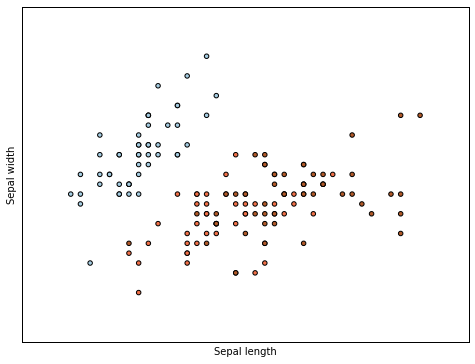

In [3]:
# plotting the dataset as is.
plot(X, Y)

Why is Metric Learning useful? We can, with prior knowledge of which points are supposed to be closer, figure out a better way to understand distances between points. Especially in higher dimensions when Euclidean distances are a poor way to measure distance, this becomes very useful.

Some good reading material for the same can be found [here](https://arxiv.org/pdf/1306.6709.pdf). It serves as a good literature review of Metric Learning. 

We will briefly explain the metric-learning algorithms implemented by metric-learn, before providing some examples for it's usage, and also discuss how to go about doing manual constraints.

### Applying Large Margin Nearest Neighbour

LMNN is a metric learning algorithm primarily designed for k-nearest neighbor classification. The algorithm is based on semidefinite programming, a sub-class of convex programming (as most Metric Learning algorithms are).

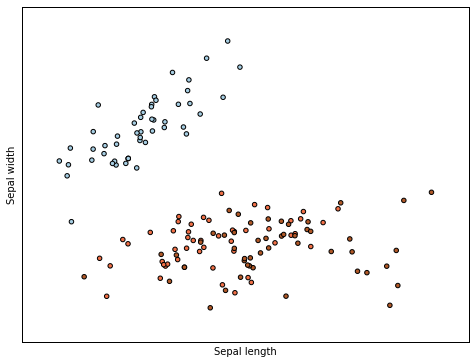

In [4]:
# applying our Metric Learning algorithm
X_lmnn = iris_data['data']
lmnn = metric_learn.LMNN(k=5, learn_rate=1e-6)
X_lmnn = lmnn.fit_transform(X, Y)

plot(X_lmnn, Y)

### Applying Information Theoretic Metric Learning 

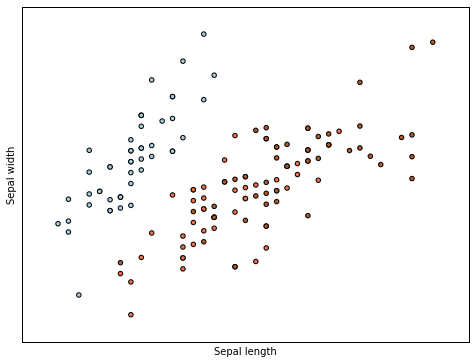

In [5]:
X = iris_data['data']
itml = metric_learn.ITML_Supervised(num_constraints=200)
itml.fit(X, Y)
X = itml.transform()

plot(X, Y)

### Applying Sparse Determinant Metric Learning

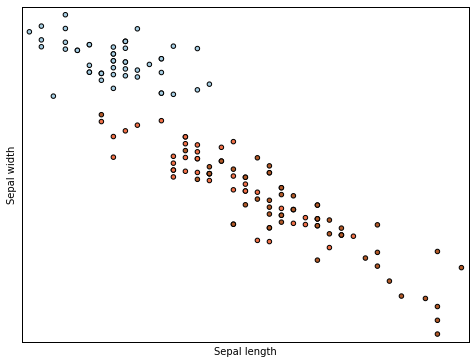

In [6]:
X = iris_data['data']
sdml = metric_learn.SDML_Supervised(num_constraints=200)
sdml.fit(X, Y)
X = sdml.transform()

plot(X, Y)

### Applying Least Squares Metric Learning

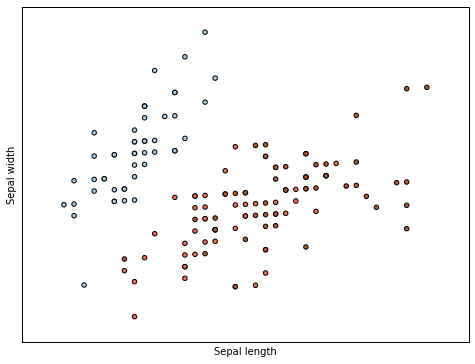

In [7]:
X = iris_data['data']
lsml = metric_learn.LSML_Supervised(num_constraints=200)
lsml.fit(X, Y)
X = lsml.transform()

plot(X, Y)

### Applying Neighborhood Components Analysis

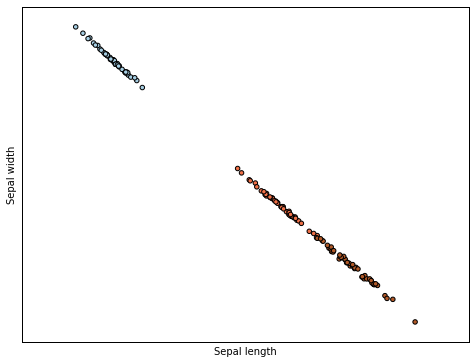

In [8]:
X = iris_data['data']
nca = metric_learn.NCA(max_iter=1000, learning_rate=0.01)
nca.fit(X, Y)
X = nca.transform()

plot(X, Y)

### Applying Local Fischer Discriminant Analysis

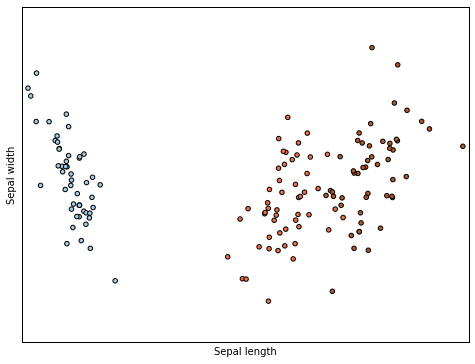

In [9]:
X = iris_data['data']
lfda = metric_learn.LFDA(k=2, dim=2)
lfda.fit(X, Y)
X = lfda.transform()

plot(X, Y)

### Applying Relative Components Analysis

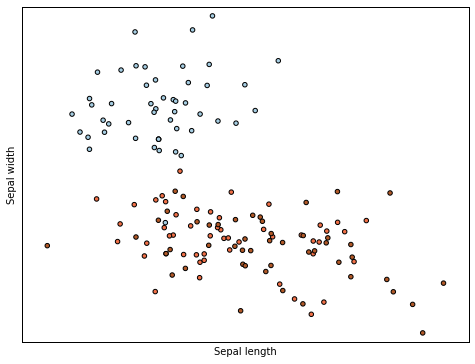

In [10]:
X = iris_data['data']
rca = metric_learn.RCA_Supervised(num_chunks=30, chunk_size=2)
rca.fit(X, Y)
X = rca.transform()

plot(X, Y)

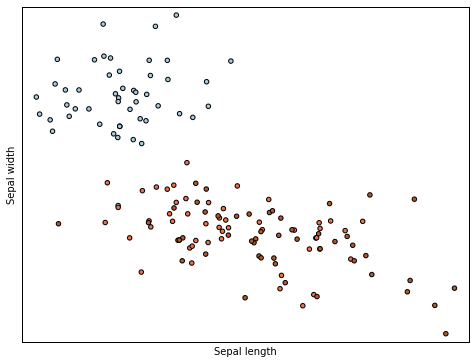

In [11]:
X = iris_data['data']
rca = metric_learn.RCA_Supervised(num_chunks=30, chunk_size=2)
X = rca.fit_transform(X, Y)

plot(X, Y)